# **Subspace**

> A **subspace** of a vector space (such as $\mathbb{R}^n$) is a subset that is also a vector space.

This means the subset must satisfy **three conditions**:

1. **Contains the zero vector**:  
   $$\vec{0} \in V$$

2. **Closed under addition**:  
   If $\vec{u}, \vec{v} \in V$, then  
   $$\vec{u} + \vec{v} \in V$$

3. **Closed under scalar multiplication**:  
   If $\vec{v} \in V$ and $c \in \mathbb{R}$, then  
   $$c \vec{v} \in V$$

> A subspace is **any set of vectors** that satisfies these three properties. It always contains the origin and is closed under linear combinations.

### **Subspaces in $\mathbb{R}^n$**

| Subspace Type          | Description                                       |
|------------------------|---------------------------------------------------|
| **Zero Subspace**      | $\{\vec{0}\}$                                     |
| **Line Through Origin**| $\text{Span}(\vec{v})$ for some nonzero $\vec{v}$ |
| **Plane Through Origin**| $\text{Span}(\vec{v}_1, \vec{v}_2)$ where $\vec{v}_1, \vec{v}_2$ are independent |
| **Column Space of A**  | All combinations of $A$'s columns: $\text{Col}(A)$ |


### Example

Let:

$$
\vec{v}_1 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \quad
\vec{v}_2 = \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}
$$

Then:

$$
\text{Span}(\vec{v}_1, \vec{v}_2) = \text{Span}(\vec{v}_1)
$$

because $\vec{v}_2 = 2 \vec{v}_1$, so they are linearly dependent.  
Their span is a **line through the origin**, not a plane.

### **Code to Check Span Dimension**

In [1]:
from sympy import Matrix

v1 = Matrix([1, 2, 3])
v2 = Matrix([2, 4, 6])  # linearly dependent

A = Matrix.hstack(v1, v2)
rref_matrix, pivot_cols = A.rref()

print("Pivot columns:", pivot_cols)
print("Dimension of span:", len(pivot_cols))
basis = [A.col(i) for i in pivot_cols]
for vec in basis:
    print(vec)

Pivot columns: (0,)
Dimension of span: 1
Matrix([[1], [2], [3]])


### **Visualizations**

1. **Line Subspace in 2D**

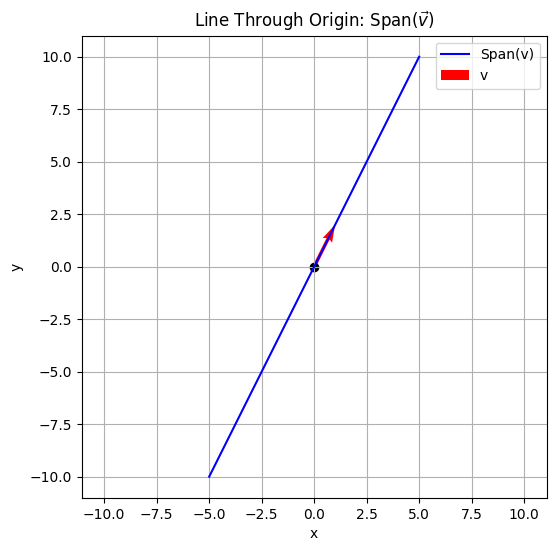

In [2]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([1, 2])
scalars = np.linspace(-5, 5, 100)
line = np.array([s * v for s in scalars])

plt.figure(figsize=(6,6))
plt.plot(line[:,0], line[:,1], label='Span(v)', color='blue')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', label='v')
plt.scatter(0, 0, color='black')  # origin
plt.axis('equal')
plt.grid()
plt.title('Line Through Origin: $\\text{Span}(\\vec{v})$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. **Plane Subspace in $\mathbb{R}^3$**

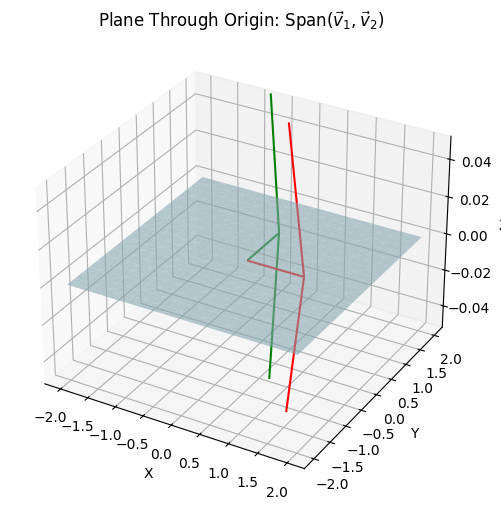

In [3]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])

s_vals = np.linspace(-2, 2, 20)
t_vals = np.linspace(-2, 2, 20)

plane_points = np.array([
    s * v1 + t * v2
    for s in s_vals
    for t in t_vals
])

x, y, z = plane_points[:,0], plane_points[:,1], plane_points[:,2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, alpha=0.6, color='lightblue')
ax.quiver(0, 0, 0, *v1, color='red', label='v1')
ax.quiver(0, 0, 0, *v2, color='green', label='v2')
ax.set_title('Plane Through Origin: $\\text{Span}(\\vec{v}_1, \\vec{v}_2)$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### **Summary**

A **subspace** is:

- A line, plane, or higher-dimensional analog
- Always passes through the origin
- Formed by all linear combinations of one or more vectors

To check whether a given set of vectors spans a subspace:

- Stack them as columns in a matrix
- Use RREF to determine how many are linearly independent
- The **dimension of the span** is the number of pivot columns